In [2]:
import dotenv

In [5]:
groq_api_key = dotenv.get_key('.env', 'GROQ_API_KEY')
langsmith_api_key = dotenv.get_key('.env', 'LANGSMITH_API_KEY')

In [7]:
import os 
os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = "BasicLanggraph"

In [8]:
from langchain_groq import ChatGroq


In [9]:
llm = ChatGroq(groq_api_key =  groq_api_key,model_name = "Llama3-70b-8192" )

# Start Building Chatbot using Langgraph

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

In [13]:
graph_builder = StateGraph(State)

In [14]:
def chatbot(state: State):
    return {"messages":llm.invoke(state["messages"])}

In [15]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [17]:
graph = graph_builder.compile()

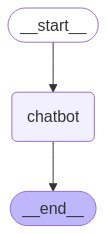

In [18]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
while True:
    user_input = input("User: ")
    if user_input == "exit":
        print("Goodbye!")
        break
    for event in graph.stream({"messages":[{"user":user_input}]}):
        print(event.values())
        for values in event.values():
            print(values['messages'])
            print("Assistant:",values['messages'].content)
   

NotImplementedError: Unsupported message type: <class 'set'>
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 